# Project_3:- Movielence_case_study

**Background of Problem Statement :**

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

**Problem Objective :**

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

**Domain:** Entertainment

**Analysis Tasks to be performed:**

* Import the three datasets
*Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
*Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
1. User Age Distribution 
2. User rating of the movie “Toy Story”
3. Top 25 movies by viewership rating
4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696
* Feature Engineering:
    Use column genres:

1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
3. Determine the features affecting the ratings of any particular movie.
4. Develop an appropriate model to predict the movie ratings

**Import the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading all three datasets

In [3]:
movi_data = pd.read_csv('movies.dat' ,sep='::' ,header=None, names=['MovieID','Title','Genres'],dtype={'MovieID': np.int32,'Title': np.str,'Genres': np.str}, engine='python',encoding = "ISO-8859-1")
rating_data = pd.read_csv('ratings.dat',sep='::',header=None, names=['UserID', 'MovieID', 'Rating','Timestamp'], dtype={'UserID': np.int32, 'MoviID': np.int32, 'Rating': np.int32,'Timestamp': np.str},engine='python',encoding = "ISO-8859-1")
user_data = pd.read_csv('users.dat', sep='::',header=None , names=['UserID', 'Gender', 'Age','Occupation','Zip_Code'], dtype={'UserID': np.int32, 'Gender': np.str, 'Age': np.int32,'Occupation': np.int32,'Zip_Code': np.str},engine='python',encoding = "ISO-8859-1")

In [4]:
movi_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movi_data.shape

(3883, 3)

In [6]:
movi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int32 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int32(1), object(2)
memory usage: 76.0+ KB


In [7]:
movi_data.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [8]:
#There are no empty colums in movi_data

In [9]:
rating_data.info()
rating_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   UserID     1000209 non-null  int32 
 1   MovieID    1000209 non-null  int64 
 2   Rating     1000209 non-null  int32 
 3   Timestamp  1000209 non-null  object
dtypes: int32(2), int64(1), object(1)
memory usage: 22.9+ MB


UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [10]:
rating_data.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [11]:
rating_data.shape

(1000209, 4)

In [12]:
#There are no empty colums in rating_data

In [13]:
user_data.info()
user_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int32 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int32 
 3   Occupation  6040 non-null   int32 
 4   Zip_Code    6040 non-null   object
dtypes: int32(3), object(2)
memory usage: 165.3+ KB


UserID        0
Gender        0
Age           0
Occupation    0
Zip_Code      0
dtype: int64

In [14]:
user_data.head()

,UserID,Gender,Age,Occupation,Zip_Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [15]:
user_data.shape

(6040, 5)

In [16]:
#There are no empty colums in user_data

**Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating**

In [17]:
first_two_data_merging = pd.merge(movi_data, rating_data, on = 'MovieID')
first_two_data_merging

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,1,979852537


In [18]:
all_Three_Data = pd.merge(first_two_data_merging, user_data, on = 'UserID')
all_Three_Data.head(10)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip_Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
5,531,"Secret Garden, The (1993)",Children's|Drama,1,4,978302149,F,1,10,48067
6,588,Aladdin (1992),Animation|Children's|Comedy|Musical,1,4,978824268,F,1,10,48067
7,594,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,1,4,978302268,F,1,10,48067
8,595,Beauty and the Beast (1991),Animation|Children's|Musical,1,5,978824268,F,1,10,48067
9,608,Fargo (1996),Crime|Drama|Thriller,1,4,978301398,F,1,10,48067


In [19]:
master_Data = all_Three_Data[['MovieID','Title','UserID','Age','Gender','Occupation','Rating']]
master_Data.head(10)

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1,1,F,10,5
1,48,Pocahontas (1995),1,1,F,10,5
2,150,Apollo 13 (1995),1,1,F,10,5
3,260,Star Wars: Episode IV - A New Hope (1977),1,1,F,10,4
4,527,Schindler's List (1993),1,1,F,10,5
5,531,"Secret Garden, The (1993)",1,1,F,10,4
6,588,Aladdin (1992),1,1,F,10,4
7,594,Snow White and the Seven Dwarfs (1937),1,1,F,10,4
8,595,Beauty and the Beast (1991),1,1,F,10,5
9,608,Fargo (1996),1,1,F,10,4


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'MovieID'),
  Text(1.5, 0, 'UserID'),
  Text(2.5, 0, 'Age'),
  Text(3.5, 0, 'Occupation'),
  Text(4.5, 0, 'Rating')])

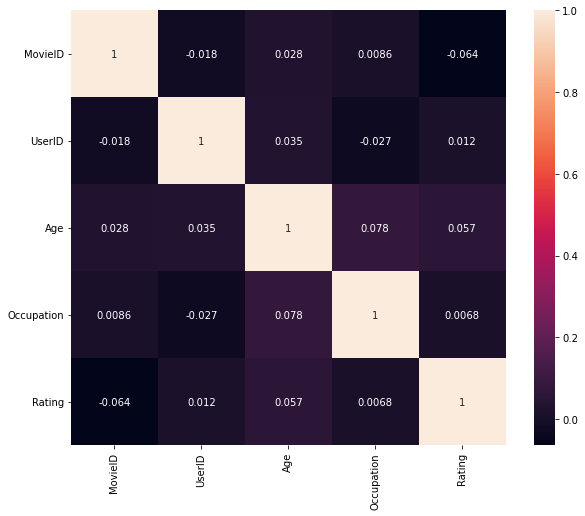

In [48]:
correlation = master_Data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=correlation,square=True,annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [20]:
master_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int32 
 1   Title       1000209 non-null  object
 2   UserID      1000209 non-null  int32 
 3   Age         1000209 non-null  int32 
 4   Gender      1000209 non-null  object
 5   Occupation  1000209 non-null  int32 
 6   Rating      1000209 non-null  int32 
dtypes: int32(5), object(2)
memory usage: 42.0+ MB


In [21]:
master_Data.shape

(1000209, 7)

In [22]:
master_Data.isnull().sum()

MovieID       0
Title         0
UserID        0
Age           0
Gender        0
Occupation    0
Rating        0
dtype: int64

## Explore the datasets using visual representations (graphs or tables)

**1. User Age Distribution**

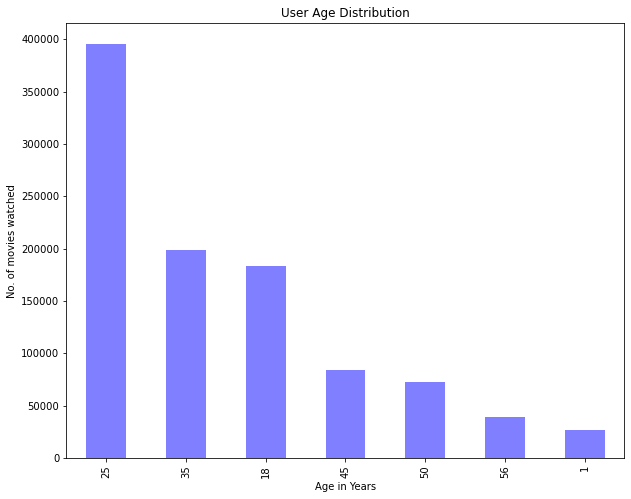

In [23]:
plt.figure(figsize=(10,8))
master_Data['Age'].value_counts().plot(kind='bar',color='b',alpha=0.50)
plt.xlabel('Age in Years')
plt.ylabel('No. of movies watched')
plt.title("User Age Distribution")
plt.show()

**Comments:-** Most movie watching age groups are 25 to 35 year old.

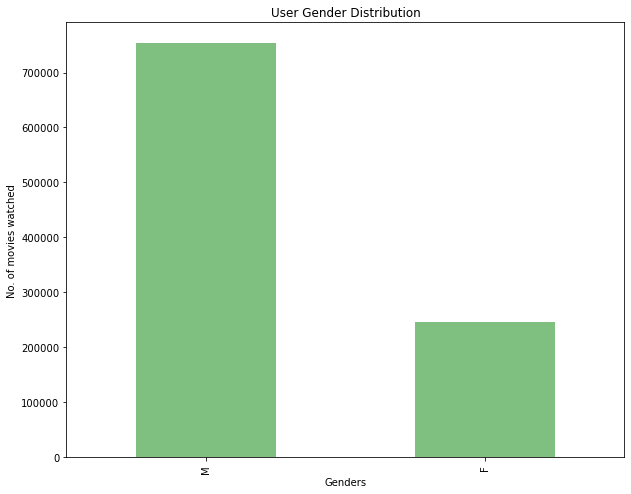

In [24]:
plt.figure(figsize=(10,8))
master_Data['Gender'].value_counts().plot(kind='bar',color='g',alpha=0.50)
plt.xlabel('Genders')
plt.ylabel('No. of movies watched')
plt.title("User Gender Distribution")
plt.show()

**Comments:-** Most movie watching by Male Genders.

## 2. User rating of the movie “Toy Story”

In [25]:
#creat datafram for toy story (1995)
Toy_story = master_Data.loc[master_Data['Title'].str.contains("Toy Story")]
print (Toy_story)

         MovieID               Title  UserID  Age Gender  Occupation  Rating
0              1    Toy Story (1995)       1    1      F          10       5
50          3114  Toy Story 2 (1999)       1    1      F          10       4
53             1    Toy Story (1995)       6   50      F           9       4
124            1    Toy Story (1995)       8   25      M          12       4
263            1    Toy Story (1995)       9   25      M          17       5
...          ...                 ...     ...  ...    ...         ...     ...
998988      3114  Toy Story 2 (1999)    3023   25      F           7       4
999027      3114  Toy Story 2 (1999)    5800   35      M          18       5
999486      3114  Toy Story 2 (1999)    2189    1      M          10       4
999869      3114  Toy Story 2 (1999)     159   45      F           0       4
1000192     3114  Toy Story 2 (1999)    5727   25      M           4       5

[3662 rows x 7 columns]


In [26]:
#Count rating for Toy Story
Toy_story['Rating'].value_counts()

5    1544
4    1413
3     559
2     105
1      41
Name: Rating, dtype: int64

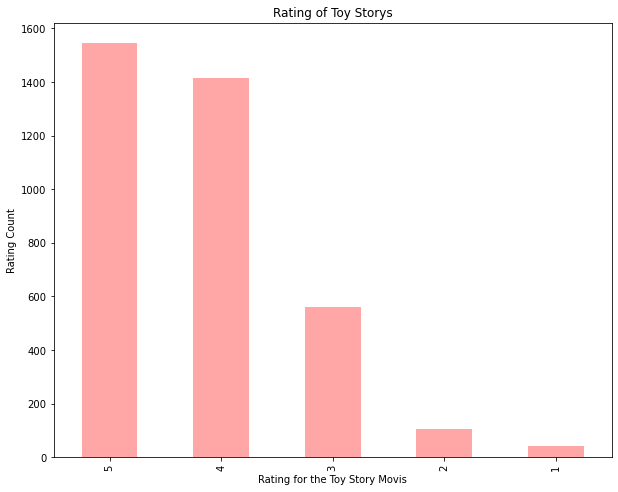

In [27]:
plt.figure(figsize=(10,8))
Toy_story['Rating'].value_counts().plot(kind='bar',color='r',alpha=0.35)
plt.xlabel('Rating for the Toy Story Movis')
plt.ylabel('Rating Count')
plt.title("Rating of Toy Storys")
plt.show()

In [28]:
# Dictionary
df_movi_rating = {'Rating': ['5', '4', '3','2', '1'],'Rating Count': [1544, 1413, 559,105, 41]}
# Create a DataFrame
df_movi_rating = pd.DataFrame(df_movi_rating, columns = ['Rating','Rating Count'])
  
# Calculating Percentage
df_movi_rating['percent'] = (df_movi_rating['Rating Count'] / 
                  df_movi_rating['Rating Count'].sum()) * 100
  
# Show the dataframe
df_movi_rating.head()

,Rating,Rating Count,percent
0,5,1544,42.162753
1,4,1413,38.585472
2,3,559,15.264883
3,2,105,2.867286
4,1,41,1.119607


**Comments:-** According to data, 42% people have given 5 star rating and 38% people have given 4 star rating to Toystory Movi.

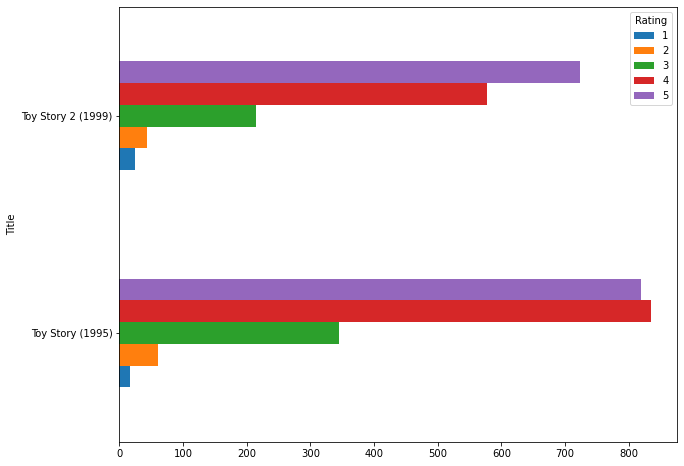

In [29]:
Toy_story.groupby(["Title","Rating"]).size().unstack().plot(kind='barh',stacked=False,legend=True,figsize=(10,8))
plt.show()

In [ ]:
toy

In [51]:
crosstab_toy_S = pd.crosstab(index=Toy_story['Title'],columns=Toy_story['Rating'])
crosstab_toy_S

Rating,1,2,3,4,5
Title,,,,,
Toy Story (1995),16,61,345,835,820
Toy Story 2 (1999),25,44,214,578,724


<AxesSubplot:xlabel='Title'>

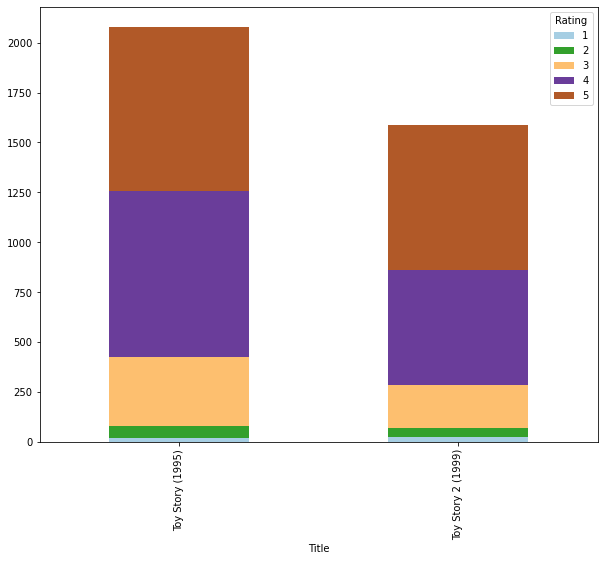

In [53]:
crosstab_toy_S.plot(kind="bar", figsize=(10,8), stacked=True, colormap = 'Paired')

## 3. Top 25 movies by viewership rating

In [61]:
# Explore Movi data for viewership by movie title
movi_data_count_by_rating = master_Data['Title'].value_counts()[0:25]
movi_data_count_by_rating

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Princess

In [32]:
# top 25 movis rating mean
Titalewise_mean = pd.DataFrame(master_Data.groupby('Title')['Rating'].mean())
Titalewise_mean.head()

,Rating
Title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568


In [33]:
Top_25 = Titalewise_mean.sort_values('Rating', ascending=False)
Top_25.head(25)

,Rating
Title,
Ulysses (Ulisse) (1954),5.000000
Lured (1947),5.000000
Follow the Bitch (1998),5.000000
Bittersweet Motel (2000),5.000000
Song of Freedom (1936),5.000000
One Little Indian (1973),5.000000
Smashing Time (1967),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000


In [80]:
Top_25.shape

(3706, 1)

In [86]:
Top_25_crosstab= pd.crosstab(index=master_Data['Title'],columns=master_Data['Rating'])
Top_25_crosstab

Rating,1,2,3,4,5
Title,,,,,
"$1,000,000 Duck (1971)",3,8,15,7,4
'Night Mother (1986),4,10,25,18,13
'Til There Was You (1997),5,20,15,10,2
"'burbs, The (1989)",36,69,107,68,23
...And Justice for All (1979),2,12,65,82,38
...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",2,3,8,13,3
Zero Effect (1998),7,32,72,108,82
Zero Kelvin (Kjærlighetens kjøtere) (1995),0,0,1,1,0


In [93]:
Top_25_ratting_count = master_Data.value_counts('Title').reset_index(name='counts') 
Top_25_ratting_count

,Title,counts
0,American Beauty (1999),3428
1,Star Wars: Episode IV - A New Hope (1977),2991
2,Star Wars: Episode V - The Empire Strikes Back...,2990
3,Star Wars: Episode VI - Return of the Jedi (1983),2883
4,Jurassic Park (1993),2672
...,...,...
3701,Target (1995),1
3702,I Don't Want to Talk About It (De eso no se ha...,1
3703,An Unforgettable Summer (1994),1
3704,Never Met Picasso (1996),1


In [95]:
#merge top 25 movi coloum with Stacked datafram
top_25_Movi_rating_cross = pd.merge(Top_25_crosstab, Top_25_ratting_count, how="right", on=["Title"])[:25]
top_25_Movi_rating_cross

,Title,1,2,3,4,5,counts
0,American Beauty (1999),83,134,358,890,1963,3428
1,Star Wars: Episode IV - A New Hope (1977),19,62,288,796,1826,2991
2,Star Wars: Episode V - The Empire Strikes Back...,22,83,375,1027,1483,2990
3,Star Wars: Episode VI - Return of the Jedi (1983),39,128,589,1099,1028,2883
4,Jurassic Park (1993),62,197,683,1098,632,2672
5,Saving Private Ryan (1998),25,67,301,855,1405,2653
6,Terminator 2: Judgment Day (1991),42,98,465,1102,942,2649
7,"Matrix, The (1999)",37,119,263,741,1430,2590
8,Back to the Future (1985),20,103,550,1119,791,2583
9,"Silence of the Lambs, The (1991)",37,43,246,902,1350,2578


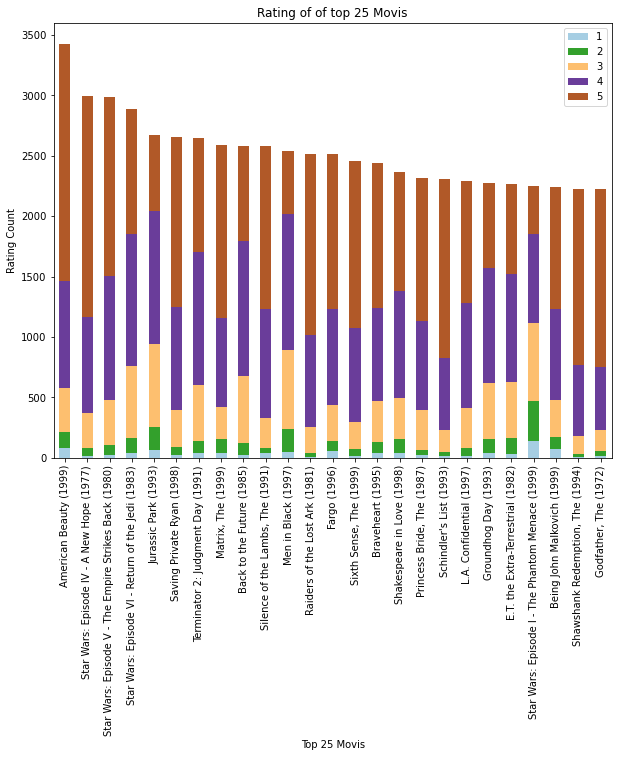

In [107]:
#Stacked barplot for ratings and top 25 movis
top_25_Movi_rating_cross.drop(['counts'], axis=1).plot(x="Title" ,kind="bar", figsize=(10,8), stacked=True, colormap = 'Paired')
plt.xlabel('Top 25 Movis')
plt.ylabel('Rating Count')
plt.title("Rating of of top 25 Movis")
plt.show()

In [68]:
top_25_Movi_data = master_Data.groupby('Title').size().sort_values(ascending=False)[:25]
top_25_Movi_data

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [69]:
top_25_Movi_data.shape

(25,)

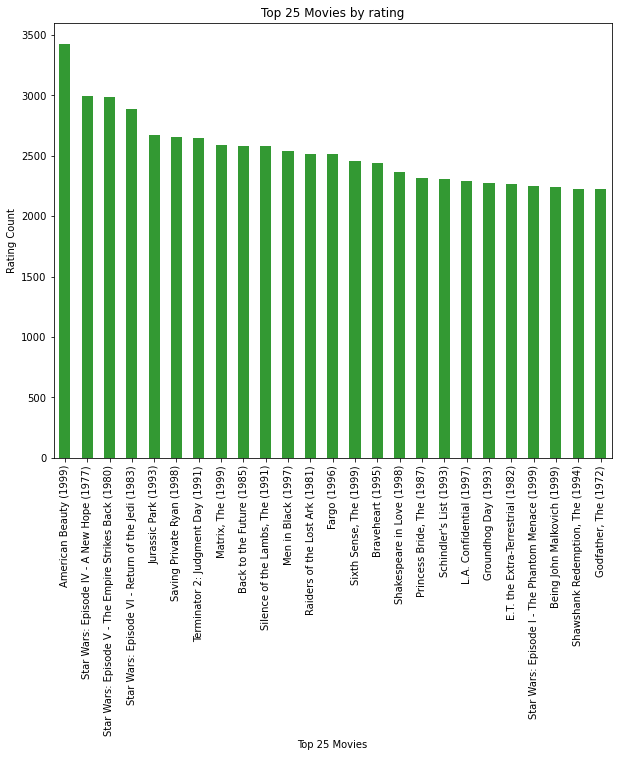

In [38]:
top_25_Movi_data.plot(kind='bar',color='g', alpha = 0.8,figsize=(10,8))
plt.xlabel("Top 25 Movies")
plt.ylabel("Rating Count")
plt.title("Top 25 Movies by rating")
plt.show()

## 4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [39]:
data_of_2696 = master_Data[master_Data['UserID']==2696]
data_of_2696.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 991035 to 991054
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MovieID     20 non-null     int32 
 1   Title       20 non-null     object
 2   UserID      20 non-null     int32 
 3   Age         20 non-null     int32 
 4   Gender      20 non-null     object
 5   Occupation  20 non-null     int32 
 6   Rating      20 non-null     int32 
dtypes: int32(5), object(2)
memory usage: 880.0+ bytes


In [42]:
print (data_of_2696)

        MovieID                                           Title  UserID  Age  \
991035      350                              Client, The (1994)    2696   25   
991036      800                                Lone Star (1996)    2696   25   
991037     1092                           Basic Instinct (1992)    2696   25   
991038     1097               E.T. the Extra-Terrestrial (1982)    2696   25   
991039     1258                             Shining, The (1980)    2696   25   
991040     1270                       Back to the Future (1985)    2696   25   
991041     1589                                 Cop Land (1997)    2696   25   
991042     1617                        L.A. Confidential (1997)    2696   25   
991043     1625                                Game, The (1997)    2696   25   
991044     1644          I Know What You Did Last Summer (1997)    2696   25   
991045     1645                    Devil's Advocate, The (1997)    2696   25   
991046     1711  Midnight in the Garden 

<AxesSubplot:title={'center':'Ratings by userID = 2696 '}, xlabel='Title'>

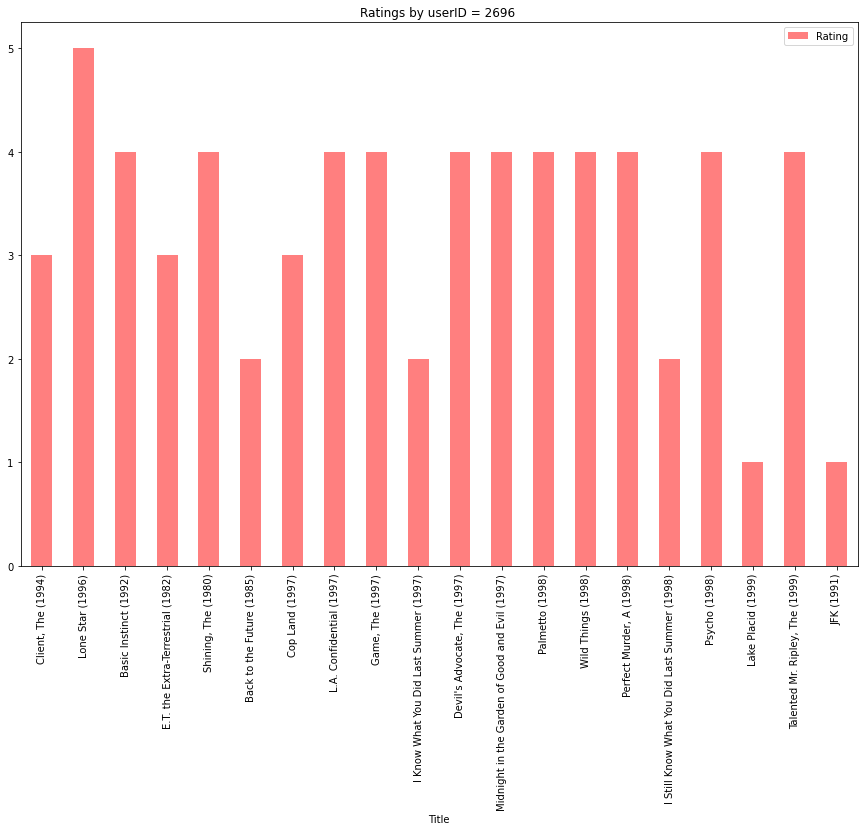

In [113]:
data_of_2696.plot(x="Title",y="Rating",kind="bar", color='r', alpha=0.5, figsize=(15,10),title = 'Ratings by userID = 2696 ')

# Feature Engineering: Use column genres

## 1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

In [116]:
Genres_data = all_Three_Data['Genres'].str.get_dummies('|')
print(Genres_data)

         Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  \
0             0          0          1           1       1      0            0   
1             0          0          1           1       0      0            0   
2             0          0          0           0       0      0            0   
3             1          1          0           0       0      0            0   
4             0          0          0           0       0      0            0   
...         ...        ...        ...         ...     ...    ...          ...   
1000204       0          0          0           0       0      0            0   
1000205       0          0          0           0       1      0            0   
1000206       0          0          0           0       1      0            0   
1000207       1          0          0           0       0      0            0   
1000208       1          0          0           0       0      0            0   

         Drama  Fantasy  Fi

In [117]:
Genres_data.columns

Index(['Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

**Comments:-** There are 18 unique genres are available in datasets.

## 2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre

In [119]:
model_data = all_Three_Data.join(all_Three_Data.pop('Genres').str.get_dummies('|'))
model_data.head()

,MovieID,Title,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip_Code,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1,5,978824268,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),1,5,978824351,F,1,10,48067,0,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),1,5,978301777,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,978300760,F,1,10,48067,1,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),1,5,978824195,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,1,0


## 3. Determine the features affecting the ratings of any particular movie.

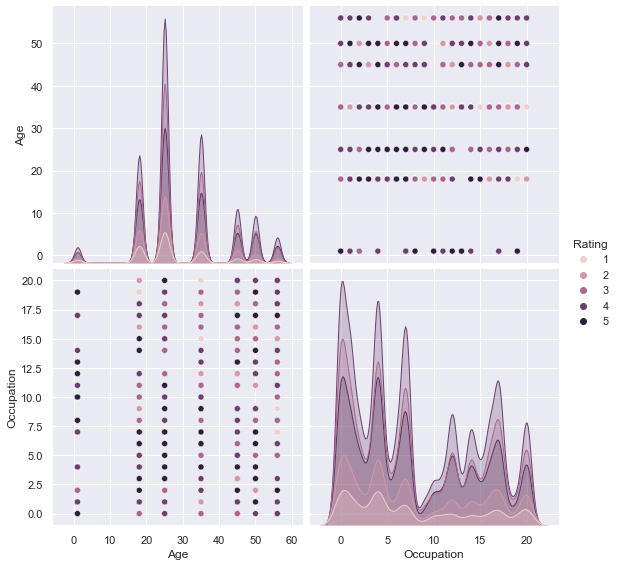

In [121]:
sns.set()
sns.pairplot(all_Three_Data[['Age','Gender','Occupation','Rating']],hue = "Rating",height=4)

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'MovieID'),
  Text(1.5, 0, 'UserID'),
  Text(2.5, 0, 'Age'),
  Text(3.5, 0, 'Occupation'),
  Text(4.5, 0, 'Rating')])

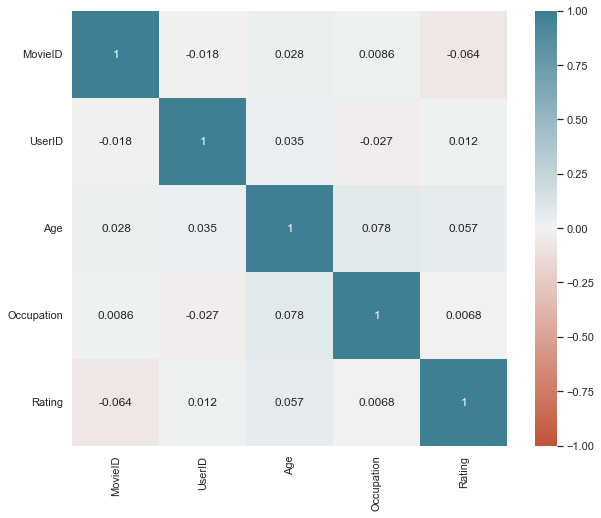

In [125]:
correlation = master_Data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=correlation,cmap=sns.diverging_palette(20, 220, n=200),vmin=-1, vmax=1, center=0,square=True,annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

**Comments:-** The pair plot and correlation plots are conclude that there is no feature affecting the ratings of any movie.

## 4. Develop an appropriate model to predict the movie ratings

In [153]:
# selecting the features for building model
model_data_ML=all_Three_Data[['MovieID','Age','Gender','Occupation','Rating']]
model_data_ML.head()
model_data_ML.shape

(1000209, 5)

In [154]:
model_data_ML.dtypes

MovieID        int32
Age            int32
Gender        object
Occupation     int32
Rating         int32
dtype: object

In [155]:
def gentoint(x):
    if (x=='F'):
     return 0
    if (x=='M'): 
     return 1
#gentoint('M')

In [156]:
model_data_ML['Gender']= model_data_ML['Gender'].apply(gentoint)

In [157]:
model_data_ML.dtypes

MovieID       int32
Age           int32
Gender        int64
Occupation    int32
Rating        int32
dtype: object

In [158]:
# features data
X_features=model_data_ML[['MovieID','Age','Gender','Occupation']]

In [159]:
X_features

,MovieID,Age,Gender,Occupation
0,1,1,0,10
1,48,1,0,10
2,150,1,0,10
3,260,1,0,10
4,527,1,0,10
...,...,...,...,...
1000204,3513,25,1,4
1000205,3535,25,1,4
1000206,3536,25,1,4
1000207,3555,25,1,4


In [160]:
Y_target=model_data_ML['Rating']

In [161]:
Y_target

0          5
1          5
2          5
3          4
4          5
          ..
1000204    4
1000205    2
1000206    5
1000207    3
1000208    5
Name: Rating, Length: 1000209, dtype: int32

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, Y_target, test_size=0.2, random_state=0)

In [163]:
# Create a logistic regression model using the training set
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [164]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [165]:
#Evaluate the accuracy of your model
y_ped=logreg.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_ped))
# logistic regression model gives 34% accuracy

0.34904670019295947


In [166]:
# use KNN classifier method - import it from sklearn
from sklearn.neighbors import KNeighborsClassifier
# instantiate the knn estimator
knn = KNeighborsClassifier(n_neighbors=6)

In [167]:
# fit data into KNN model (estimator)
knn.fit(X_features,Y_target)

KNeighborsClassifier(n_neighbors=6)

In [168]:
#Evaluate the accuracy of your model
y_ped=knn.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_ped))
#KNN model gives 46% accuracy

0.4680617070415213


**Comments:-** KNN is gives 46 % accuracy.